In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_XLB = pd.read_csv('XLB_historico.csv')

print(df_XLB.head())

                        Date       Open       High        Low      Close  \
0  1998-12-22 00:00:00-05:00  11.633889  11.660131  11.616394  11.660131   
1  1998-12-23 00:00:00-05:00  11.738849  11.835069  11.738849  11.782585   
2  1998-12-24 00:00:00-05:00  11.922544  12.053753  11.870060  12.053753   
3  1998-12-28 00:00:00-05:00  12.036263  12.036263  11.931296  11.948791   
4  1998-12-29 00:00:00-05:00  12.167473  12.167473  12.167473  12.167473   

   Volume  Dividends  Stock Splits  Capital Gains  
0    1900        0.0           0.0            0.0  
1     700        0.0           0.0            0.0  
2    1500        0.0           0.0            0.0  
3    2500        0.0           0.0            0.0  
4     100        0.0           0.0            0.0  


Tipo de 'Date': datetime64[ns]
0   1998-12-24 05:00:00
1   1998-12-28 05:00:00
2   1998-12-29 05:00:00
3   1998-12-30 05:00:00
4   1998-12-31 05:00:00
Name: Date, dtype: datetime64[ns]
El DataFrame df_XLB se ha guardado como 'df_XLB.csv'.


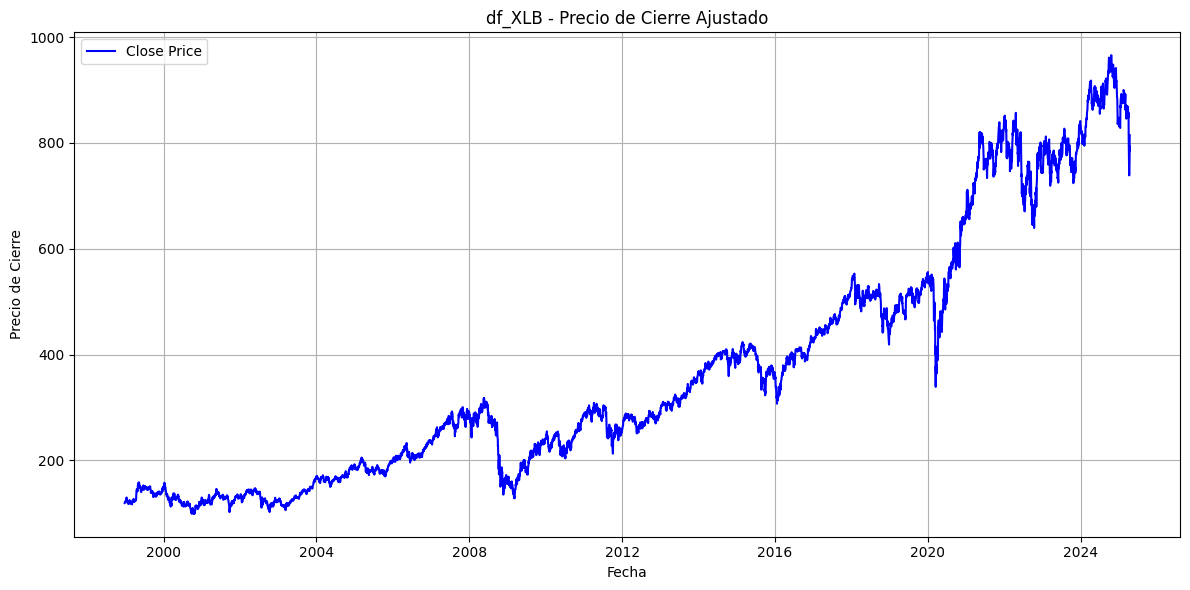

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_XLB = pd.read_csv('XLB_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_XLB = df_XLB.iloc[:, :-3]

# Renombrar las columnas
df_XLB.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_XLB = df_XLB.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' a datetime forzando el uso de UTC
df_XLB['Date'] = pd.to_datetime(df_XLB['Date'], errors='coerce', utc=True)

# Convertir los datetimes *tz-aware* a datetimes *naive* (sin zona horaria)
df_XLB['Date'] = df_XLB['Date'].dt.tz_convert(None)

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:  
        value /= 10
    # Si el valor escalado es menor a 100, reducirlo según tu lógica
    if value < 100:
        value /= 10
    return round(value, 2)

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_XLB[col] = df_XLB[col].apply(clean_and_scale)

# Condición final:
# Para filas anteriores al año 2016, si en las columnas Open, High, Low o Close el valor es superior a 250, se divide entre 10.
mask = df_XLB['Date'] < pd.to_datetime("2004-01-01")
for col in ['Open', 'High', 'Low', 'Close']:
    df_XLB.loc[mask & (df_XLB[col] > 200), col] = df_XLB.loc[mask & (df_XLB[col] > 200), col] / 10

# Verificar la conversión de 'Date'
print("Tipo de 'Date':", df_XLB['Date'].dtype)
print(df_XLB['Date'].head())

# Guardar el DataFrame en un archivo CSV
df_XLB.to_csv("df_XLB.csv", sep=';', decimal=',', index=False, encoding='utf-8')
print("El DataFrame df_XLB se ha guardado como 'df_XLB.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_XLB['Date'], df_XLB['Close'], label='Close Price', color='blue')
plt.title('df_XLB - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()